# Proyek Pertama:  Menyelesaikan Permasalahan Human Resources

- Nama: Yoga Samudra
- Email: 08samudra@gmail.com
- Id Dicoding: 08samudra

## Persiapan

### Menyiapkan library yang dibutuhkan

In [28]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay



# Konfigurasi visualisasi
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Menyiapkan data yang akan digunakan

In [29]:
# Membaca datasets
df = pd.read_csv('datasets/employee_data.csv')

# Menampilkan 5 baris pertama data
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [30]:
# Melihat dimensi data
print("Jumlah baris dan kolom:", df.shape)

# Melihat tipe data setiap kolom
print("\nTipe data setiap kolom:")
print(df.dtypes)

# Melihat informasi ringkas data
print("\nInfo ringkas data:")
df.info()

# Melihat statistik deskriptif data numerik
print("\nStatistik deskriptif data numerik:")
display(df.describe())

# Melihat statistik deskriptif data kategorik
print("\nStatistik deskriptif data kategorik:")
display(df.describe(include='object'))

Jumlah baris dan kolom: (1470, 35)

Tipe data setiap kolom:
EmployeeId                    int64
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
Stan

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



Statistik deskriptif data kategorik:


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


## Data Preparation / Preprocessing

In [31]:
# Mengecek missing value pada setiap kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLife

In [32]:
# Mengecek duplikasi data
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [33]:
# (Opsional) Jika ada missing value, bisa diisi dengan mean/median/modus atau di-drop
df = df.dropna()  # Jika ingin menghapus baris yang mengandung missing value
print("\nSetelah menghapus missing value, jumlah baris:", df.shape[0])


Setelah menghapus missing value, jumlah baris: 1058


In [34]:
print("\nInfo data setelah preprocessing:")
df.info()


Info data setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non

## Exploratory Data Analysis (EDA)

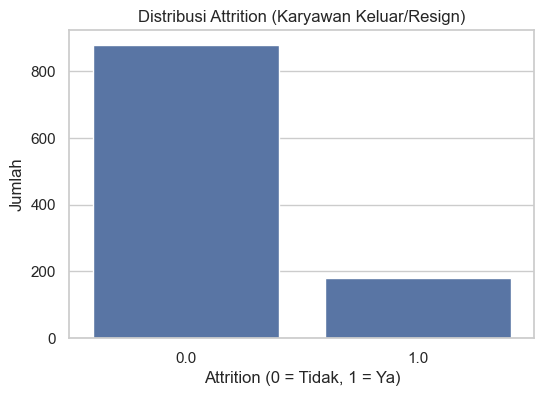

Persentase karyawan yang keluar (Attrition = 1): 16.92%


In [35]:
# Melihat distribusi target Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition (Karyawan Keluar/Resign)')
plt.xlabel('Attrition (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah')
plt.show()

# Melihat proporsi Attrition dalam persentase
attrition_rate = df['Attrition'].mean() * 100
print(f"Persentase karyawan yang keluar (Attrition = 1): {attrition_rate:.2f}%")

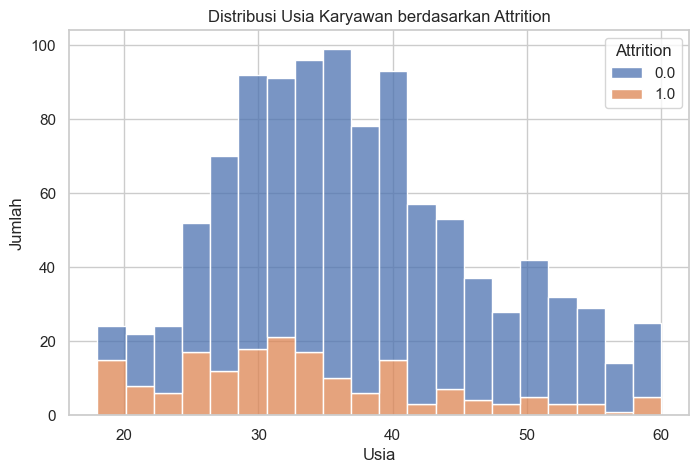

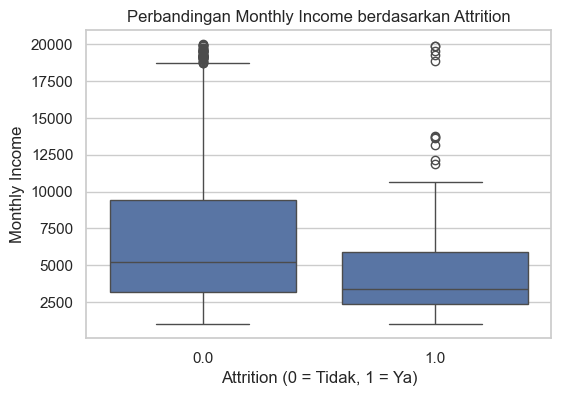

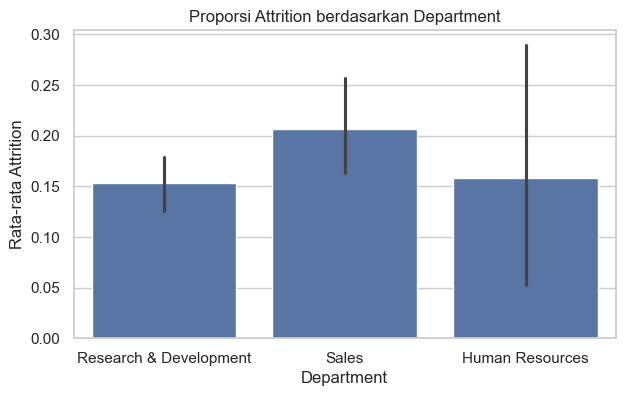

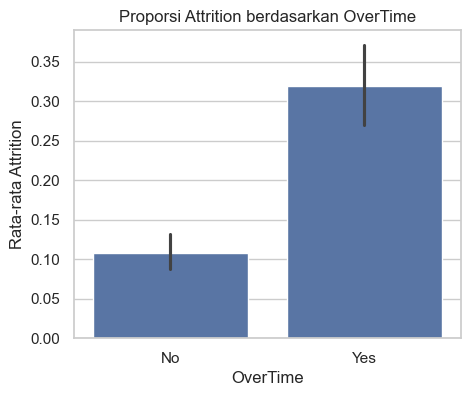

In [36]:
# Distribusi usia karyawan berdasarkan status attrition
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=20)
plt.title('Distribusi Usia Karyawan berdasarkan Attrition')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

# Rata-rata pendapatan bulanan berdasarkan status attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Perbandingan Monthly Income berdasarkan Attrition')
plt.xlabel('Attrition (0 = Tidak, 1 = Ya)')
plt.ylabel('Monthly Income')
plt.show()

# Proporsi attrition berdasarkan Department
plt.figure(figsize=(7,4))
sns.barplot(x='Department', y='Attrition', data=df)
plt.title('Proporsi Attrition berdasarkan Department')
plt.ylabel('Rata-rata Attrition')
plt.xlabel('Department')
plt.show()

# Proporsi attrition berdasarkan OverTime
plt.figure(figsize=(5,4))
sns.barplot(x='OverTime', y='Attrition', data=df)
plt.title('Proporsi Attrition berdasarkan OverTime')
plt.ylabel('Rata-rata Attrition')
plt.xlabel('OverTime')
plt.show()

## Data Cleaning

In [37]:
# Menghapus kolom yang tidak memiliki variasi atau tidak relevan untuk analisis/modeling
cols_to_drop = ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']
df_clean = df.drop(columns=cols_to_drop)

In [38]:
# Mengecek kembali tipe data
print("Tipe data setelah drop kolom tidak relevan:")
print(df_clean.dtypes)

Tipe data setelah drop kolom tidak relevan:
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance     

In [39]:
# Melakukan encoding pada data kategorikal (One-Hot Encoding)
df_clean = pd.get_dummies(df_clean, drop_first=True)

In [40]:
# Menampilkan 5 baris pertama data yang sudah dibersihkan dan diencoding
df_clean.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1,37,1.0,1141,11,2,1,61,1,2,2,...,False,False,False,False,False,False,False,True,False,False
2,51,1.0,1323,4,4,1,34,3,1,3,...,False,False,False,False,True,False,False,True,False,True
3,42,0.0,555,26,3,3,77,3,4,2,...,False,False,False,False,False,True,False,True,False,False
6,40,0.0,1124,1,2,2,57,1,2,4,...,False,False,False,False,False,True,False,True,False,True
7,55,1.0,725,2,3,4,78,3,5,1,...,False,True,False,False,False,False,False,True,False,True


In [41]:
df_clean.to_csv('datasets/attrition_data.csv', index=False)

## Split Data (train-test split)

In [42]:
# Memisahkan fitur dan target
X = df_clean.drop('Attrition', axis=1)
y = df_clean['Attrition']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])

Jumlah data train: 846
Jumlah data test: 212


## Modeling

Pada tahap ini, kita akan membangun model machine learning untuk memprediksi kemungkinan karyawan keluar (attrition). Kita akan mulai dengan model Logistic Regression sebagai baseline.

In [43]:
# Membuat dan melatih model Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

c:\Users\Yoga Samudra\Desktop\Proyek_Menyelesaikan_Permasalahan_Human_Resources_Perusahaan\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
# Memprediksi data uji
y_pred = model.predict(X_test)

In [45]:
# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8537735849056604

Confusion Matrix:
 [[173   3]
 [ 28   8]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       176
         1.0       0.73      0.22      0.34        36

    accuracy                           0.85       212
   macro avg       0.79      0.60      0.63       212
weighted avg       0.84      0.85      0.82       212



In [46]:
# Simpan model
joblib.dump(model, 'model/model_logreg.pkl')
np.save('model/features_list.npy', X_train.columns)

## Evaluation

Hasil evaluasi model Logistic Regression menunjukkan akurasi sebesar 85%. Namun, model cenderung lebih baik dalam memprediksi karyawan yang tidak keluar (Attrition = 0) dibandingkan yang keluar (Attrition = 1), terlihat dari nilai recall yang rendah pada kelas 1. Hal ini umum terjadi pada data yang imbalance. Anda dapat mempertimbangkan teknik balancing data atau mencoba model lain untuk meningkatkan performa prediksi pada kelas minoritas.

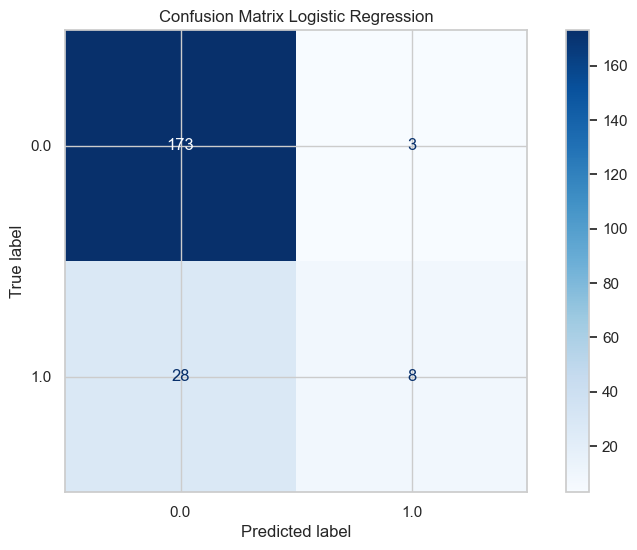

In [47]:
# Visualisasi confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.show()